# Test de Hipótesis (Detector de mentiras)

## Consigna

Considere que hay una población de individuos (A) en donde el 70% dicen la verdad.
Si no tenemos otra información que la anterior, la probabilidad de que un individuo
seleccionado al azar diga la verdad es igual a 0.7. Esta probabilidad se conoce con el nombre de probabilidad a priori.

Considere ahora que cuando un individuo dice una mentira, su pulso cardíaco se acelera y la densidad de probabilidad del la variable aleatoria que mide las pulsaciones tiene una distribución exponencial con parámetro $\beta=0.01$. Por otro lado la distribución cuando dicen la verdad es también exponencial pero con parámentro $\alpha =0.1$

Obtenga los histogramas de las pulsasiones cardíacas para los individuos de la población (A) que dicen la verdad y que mienten
¿Cual es la probabilidad de que un individuo seleccionado al azar diga la verdad cuando tiene XX  pulsasiones cardíacas? Esta probabilidad se conoce como probabilidad a posteriori?

¿El conocer las pulsasiones en que porcentaje mejora la probabilidad de deterctar que un individuo miente o dice la verdad?

## Resolución

Comienzo importando los paquetes de Python necesarios.

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 

Comienzo definiendo los parámetros conocidos.

In [2]:
beta = 0.01
lie = np.random.exponential(1/beta,100000)
alpha = 0.1
truth = np.random.exponential(1/alpha,100000)

Se obtienen entonces, los siguientes histogramas:

Text(0.5, 1.0, 'Histograma de las variables aleatorias exponenciales')

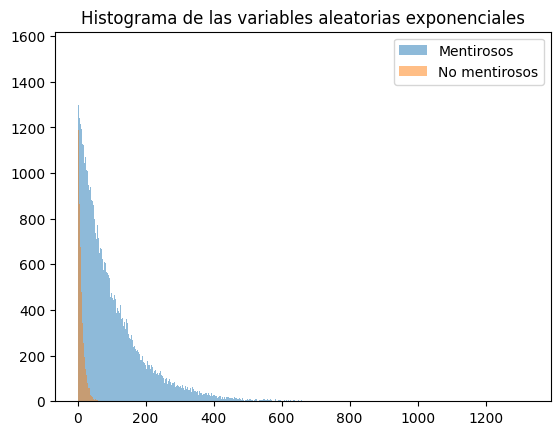

In [3]:
plt.hist(lie,bins=1000,alpha=0.5,label='Mentirosos')
plt.hist(truth,bins=1000,alpha=0.5,label='No mentirosos')
plt.legend(loc='best')
plt.title('Histograma de las variables aleatorias exponenciales')

### Probabilidad a posteriori

Según [Wikipedia](https://es.wikipedia.org/wiki/Probabilidad_a_posteriori), la probabilidad a posteriori, conocida también como *probabilidad condicional inversa*, de un evento aleatorio, es la probabilidad condicional que es asignada luego de que la evidencia es tomada en cuenta.

*"Teniendo la creencia a priori de que la función de distribución de probabilidad es $p(\theta)$ y de que una observación $X$ con la verosimilitud $p(X|\theta)$, la probabilidad condicional inversa es definida como $p(\theta |X)\propto p(\theta)p(X|\theta) $".*

#### Cálculo

De acuerdo a [AcademiaLab](https://academia-lab.com/enciclopedia/probabilidad-a-posteriori/) la distribución de probabilidad postertior de una variable aleatorioa dado el valor de otra puede calcularse con el teorema de Bayes. Esto es, multiplicando la distribución de probabilidad anterior por la función de probabilidad y luego dividiéndola por la constante de normalización, de la siguiente manera:

$$
 f_{X|Y=y}(x)= \frac{f_X(x) \mathcal{L}_{X|Y=y}(x)}{\int^\infty_{-\infty}f_X(u)\mathcal{L}_{X|Y=y}(u)du} 
$$

obteniéndose así la función de densidad de probabilidad posterior para una variable aleatoria $X$ dados los datos $Y=y$, en donde:
- $f_X(x)$ es la densidad previa de $X$
- $\mathcal{L}_{X|Y=y}(x) = f_{Y|X=x}(y)$ es la función de verosimilitud en función de $x$
- $\int^\infty_{-\infty}f_X(u)\mathcal{L}_{X|Y=y}(u)du$ es la constante de normalización
- $f_{X|Y=y}(x)$ es la densidad posterior de $X$ dados los datos $Y=y$

#### Cálculo

In [4]:
liePrior = np.random.uniform(low=0,high=0.5)
truePrior = 1-liePrior
pulse = np.random.uniform(low=20,high=90)
print('Teniendo como referencia un pulso de: ',pulse)
lieProb = np.exp(-alpha*pulse)*alpha
truthProb = np.exp(-beta*pulse)*beta
postTrue = (truthProb*truePrior)/(truthProb*truePrior+lieProb*liePrior)
postLie = 1-postTrue
seriesP = 'Probabilidad a posteriori verdad [%]', 'Probabilidad a posteriori mentira [%]'
dataP = (postTrue*100), (postLie*100)
postProbs = pd.Series(dataP,seriesP)
print(postProbs)

Teniendo como referencia un pulso de:  52.4743114201176
Probabilidad a posteriori verdad [%]     92.226572
Probabilidad a posteriori mentira [%]     7.773428
dtype: float64


## Enlaces útiles

A continuación, se adjuntan algunos enlaces útiles que fueron consultados durante el desarrollo.

- [A Guide to Bayesian Statistics in Python for Beginners](https://analyticsindiamag.com/a-guide-to-bayesian-statistics-in-python-for-beginners/#:~:text=In%20the%20formula%20of%20the%20Bayes%20theorem%2C%20P(B%7C,present%20and%20taken%20into%20account.))

- [How to use Bayesian Inference for predictions in Python](https://towardsdatascience.com/how-to-use-bayesian-inference-for-predictions-in-python-4de5d0bc84f3)

- [Teorema de Bayes en Machine Learning, breve intoducción](https://sitiobigdata.com/2019/12/24/teorema-de-bayes-en-machine-learning/)

- [Implementar el teorema de Bayes en Python (con código)](https://programmerclick.com/article/80981456441/)

- [statistics — Funciones de estadística matemática](https://docs.python.org/es/3.9/library/statistics.html)